# Quick intro

This is a jupyter notebook for testing / coding. So far, each code block is a separate test; unlike an ordinary notebook, they are not meant to run sequentially.

Let's do MCMC:


Next, running "ei". This started out as a copy of Fritz's code but it's evolved into a working version of ours.

base:Yes, I will run. line 5 2 :
Reloading polytopize.
base:Yes, I will run. line 5 3 :
Reloading polytopize.
exception: [Errno 2] No such file or directory: 'ei_post_results_fixedalpha/scenario_SIG0.3_0_N2774.csv'
alpha beta line 51 1 :
     tensor([ 0.2800,  0.2000, -0.4800])
     tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2800,  0.2000, -0.4800]) line 51 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 51 1 :
y[0]:tensor([[1136.,  449., 1295.],
        [  90.,  126.,    8.],
        [  43.,   34.,   27.]]) line 51 1 :
VS tensor([[1269.,  609., 1330.],
        [1023.,  946., 1248.],
        [1341., 1292., 1693.],
        [ 663.,  360., 1299.]])
ei_post_results_fixedalpha/scenario_SIG0.3_0_N2774.csv created
svi.step(... line 51 1 :
     0
     27.74
     torch.Size([100, 9])
guide:begin line 51 1 :
     27.74
     True
types? li

sds: tensor(0.3465, grad_fn=<StdBackward0>) tensor(0.3317, requires_grad=True) tensor(0.3007, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0477, -0.1015], grad_fn=<SliceBackward>)
epoch 90 loss = 6.07E+08, mean_loss=7.04E+08;
 logitstar = tensor([[ 0.0696, -0.1443,  0.0747],
        [ 0.0281, -0.0646,  0.0366],
        [ 0.0456, -0.0957,  0.0501]], grad_fn=<AddBackward0>)
sds: tensor(0.2838, grad_fn=<StdBackward0>) tensor(0.2728, requires_grad=True) tensor(0.2452, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0449, -0.0938], grad_fn=<SliceBackward>)
epoch 100 loss = 6.86E+08, mean_loss=7.02E+08;
 logitstar = tensor([[ 0.0707, -0.1494,  0.0787],
        [ 0.0172, -0.0499,  0.0328],
        [ 0.0466, -0.0820,  0.0353]], grad_fn=<AddBackward0>)
sds: tensor(0.2905, grad_fn=<StdBackward0>) tensor(0.2789, requires_grad=True) tensor(0.2490, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0414, -0.0975], grad_fn=<SliceBackward>)
epoch 110 loss = 7.35E+08, mean_loss=7.05E+08;
 logitstar

    Size 6: [400]; noNAN
sampleYs line 1419 6 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 7 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 7 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 8 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 8 :
     
    Size 0: [400, 13]; noN

types? line 100 32
sds: tensor(0.2669, grad_fn=<StdBackward0>) tensor(0.2503, requires_grad=True) tensor(0.2141, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0508, -0.0550], grad_fn=<SliceBackward>)
epoch 10 loss = 6.97E+08, mean_loss=7.60E+08;
 logitstar = tensor([[-0.0445, -0.0529,  0.0974],
        [-0.0501, -0.0570,  0.1070],
        [-0.0578, -0.0551,  0.1129]], grad_fn=<AddBackward0>)
svi.step(... line 51 16
guide:begin line 51 16
lp:  line 51 16
guide:end line 51 16
model:end line 51 32
sds: tensor(0.2652, grad_fn=<StdBackward0>) tensor(0.2531, requires_grad=True) tensor(0.2210, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0611, -0.0917], grad_fn=<SliceBackward>)
epoch 20 loss = 6.91E+08, mean_loss=7.54E+08;
 logitstar = tensor([[-0.0549, -0.0982,  0.1531],
        [-0.0670, -0.0912,  0.1582],
        [-0.0615, -0.0859,  0.1473]], grad_fn=<AddBackward0>)
types? line 100 64
sds: tensor(0.3400, grad_fn=<StdBackward0>) tensor(0.3347, requires_grad=True) tensor(0.2963, grad_

sds: tensor(0.1351, grad_fn=<StdBackward0>) tensor(0.1077, requires_grad=True) tensor(0.0520, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2322, 0.2130], grad_fn=<SliceBackward>)
epoch 210 loss = 6.51E+08, mean_loss=6.87E+08;
 logitstar = tensor([[-0.0170, -0.3513,  0.3683],
        [ 0.5776,  0.9168, -1.4944],
        [ 0.1361,  0.0736, -0.2097]], grad_fn=<AddBackward0>)
sds: tensor(0.1934, grad_fn=<StdBackward0>) tensor(0.1600, requires_grad=True) tensor(0.0655, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2459, 0.2169], grad_fn=<SliceBackward>)
epoch 220 loss = 7.16E+08, mean_loss=6.84E+08;
 logitstar = tensor([[ 0.0074, -0.3377,  0.3303],
        [ 0.5991,  0.9344, -1.5334],
        [ 0.1314,  0.0540, -0.1854]], grad_fn=<AddBackward0>)
sds: tensor(0.1555, grad_fn=<StdBackward0>) tensor(0.1276, requires_grad=True) tensor(0.0573, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2358, 0.2036], grad_fn=<SliceBackward>)
epoch 230 loss = 6.38E+08, mean_loss=6.82E+08;
 logitstar = te

sds: tensor(0.1691, grad_fn=<StdBackward0>) tensor(0.1355, requires_grad=True) tensor(0.0633, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2591, 0.1893], grad_fn=<SliceBackward>)
epoch 420 loss = 7.61E+08, mean_loss=6.76E+08;
 logitstar = tensor([[-7.8725e-04, -3.3669e-01,  3.3747e-01],
        [ 5.7289e-01,  9.3689e-01, -1.5098e+00],
        [ 2.0527e-01, -3.2300e-02, -1.7297e-01]], grad_fn=<AddBackward0>)
sds: tensor(0.1698, grad_fn=<StdBackward0>) tensor(0.1345, requires_grad=True) tensor(0.0571, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2528, 0.1832], grad_fn=<SliceBackward>)
epoch 430 loss = 6.25E+08, mean_loss=6.75E+08;
 logitstar = tensor([[-0.0119, -0.3489,  0.3608],
        [ 0.5666,  0.9288, -1.4954],
        [ 0.2038, -0.0303, -0.1734]], grad_fn=<AddBackward0>)
sds: tensor(0.1733, grad_fn=<StdBackward0>) tensor(0.1422, requires_grad=True) tensor(0.0608, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2509, 0.1873], grad_fn=<SliceBackward>)
epoch 440 loss = 6.68E+08,

    Size 6: [400]; noNAN
np complete? line 1311 2048
sampleYs line 1419 2048
denses line 1433 3 :
     
    Size 0: [400, 4]; noNAN
    rerunGuide 2774 2082 None 694
jsonizing 2
sampleYs0 line 1384 3 :
     
    Size 0: [400, 7]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 4]; noNAN
    Size 3: [400]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400]; noNAN
    Size 6: [400]; noNAN
denses line 1433 4 :
     
    Size 0: [400, 4]; noNAN
Done trainGuide..................................................
.
.
.
.
.
.
.
.
.
.
exception: [Errno 2] No such file or directory: 'ei_post_results_fixedalpha/scenario_SIG0.02_0_N2774.csv'
alpha beta line 51 1 :
     tensor([ 0.2800,  0.2000, -0.4800])
     tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2800,  0.2000, -0.4800]) line 51 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 51 1 

sds: tensor(0.1264, grad_fn=<StdBackward0>) tensor(0.1125, requires_grad=True) tensor(0.0715, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.1333, 0.0953], grad_fn=<SliceBackward>)
epoch 80 loss = 6.35E+08, mean_loss=7.20E+08;
 logitstar = tensor([[ 0.0041, -0.2650,  0.2609],
        [ 0.1920,  0.3906, -0.5826],
        [ 0.2037,  0.1602, -0.3639]], grad_fn=<AddBackward0>)
types? line 100 256
sds: tensor(0.1088, grad_fn=<StdBackward0>) tensor(0.0978, requires_grad=True) tensor(0.0535, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.1665, 0.1377], grad_fn=<SliceBackward>)
epoch 90 loss = 6.43E+08, mean_loss=7.15E+08;
 logitstar = tensor([[ 0.0048, -0.2725,  0.2678],
        [ 0.2619,  0.4829, -0.7449],
        [ 0.2328,  0.2028, -0.4356]], grad_fn=<AddBackward0>)
sds: tensor(0.1387, grad_fn=<StdBackward0>) tensor(0.1144, requires_grad=True) tensor(0.0603, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.1893, 0.1603], grad_fn=<SliceBackward>)
epoch 100 loss = 7.53E+08, mean_loss=7.11E+0

        [ 0.2333,  0.0598, -0.2931]], grad_fn=<AddBackward0>)
sds: tensor(0.1366, grad_fn=<StdBackward0>) tensor(0.1096, requires_grad=True) tensor(0.0286, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2503, 0.2030], grad_fn=<SliceBackward>)
epoch 290 loss = 6.42E+08, mean_loss=6.71E+08;
 logitstar = tensor([[ 0.0044, -0.3565,  0.3521],
        [ 0.5054,  0.9012, -1.4065],
        [ 0.2412,  0.0644, -0.3056]], grad_fn=<AddBackward0>)
sds: tensor(0.1757, grad_fn=<StdBackward0>) tensor(0.1394, requires_grad=True) tensor(0.0288, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2458, 0.2017], grad_fn=<SliceBackward>)
epoch 300 loss = 6.83E+08, mean_loss=6.72E+08;
 logitstar = tensor([[-0.0092, -0.3511,  0.3603],
        [ 0.4965,  0.9049, -1.4014],
        [ 0.2500,  0.0514, -0.3014]], grad_fn=<AddBackward0>)
sds: tensor(0.1423, grad_fn=<StdBackward0>) tensor(0.1132, requires_grad=True) tensor(0.0281, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2532, 0.2026], grad_fn=<SliceBackward>)


        [ 2.7743e-01,  4.4444e-02, -3.2188e-01]], grad_fn=<AddBackward0>)
sds: tensor(0.1822, grad_fn=<StdBackward0>) tensor(0.1475, requires_grad=True) tensor(0.0295, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2602, 0.2003], grad_fn=<SliceBackward>)
epoch 500 loss = 6.37E+08, mean_loss=6.66E+08;
 logitstar = tensor([[-0.0110, -0.3503,  0.3613],
        [ 0.5065,  0.9151, -1.4216],
        [ 0.2851,  0.0361, -0.3212]], grad_fn=<AddBackward0>)
sds: tensor(0.1538, grad_fn=<StdBackward0>) tensor(0.1299, requires_grad=True) tensor(0.0323, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2610, 0.1998], grad_fn=<SliceBackward>)
epoch 510 loss = 6.58E+08, mean_loss=6.68E+08;
 logitstar = tensor([[-0.0124, -0.3432,  0.3556],
        [ 0.5105,  0.9027, -1.4132],
        [ 0.2849,  0.0398, -0.3247]], grad_fn=<AddBackward0>)
svi.step(... line 51 512
guide:begin line 51 512
lp:  line 51 512
guide:end line 51 512
model:end line 51 1024
sds: tensor(0.1152, grad_fn=<StdBackward0>) tensor(0.0992, 

    rerunGuide 2774 2082 None 694
jsonizing 2
sampleYs0 line 1384 3 :
     
    Size 0: [400, 7]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 4]; noNAN
    Size 3: [400]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400]; noNAN
    Size 6: [400]; noNAN
denses line 1433 4 :
     
    Size 0: [400, 4]; noNAN
Done trainGuide..................................................
.
.
.
.
.
.
.
.
.
.
exception: [Errno 2] No such file or directory: 'ei_post_results_fixedalpha/scenario_SIG0.3_1_N2774.csv'
alpha beta line 51 1 :
     tensor([ 0.2800,  0.2000, -0.4800])
     tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2800,  0.2000, -0.4800]) line 51 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 51 1 :
y[0]:tensor([[ 881.,  507., 1492.],
        [  96.,  113.,   15.],
        [  47.,   45.,   12.]]) line 51 1 :
VS tensor([[1024.,  

 ecstar = tensor([ 0.0366, -0.0870], grad_fn=<SliceBackward>)
epoch 80 loss = 7.08E+08, mean_loss=6.88E+08;
 logitstar = tensor([[ 0.0544, -0.1223,  0.0679],
        [ 0.0142, -0.0583,  0.0441],
        [ 0.0412, -0.0805,  0.0393]], grad_fn=<AddBackward0>)
types? line 100 256
sds: tensor(0.2960, grad_fn=<StdBackward0>) tensor(0.2828, requires_grad=True) tensor(0.2594, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0402, -0.0929], grad_fn=<SliceBackward>)
epoch 90 loss = 6.72E+08, mean_loss=6.90E+08;
 logitstar = tensor([[ 0.0567, -0.1296,  0.0728],
        [ 0.0172, -0.0537,  0.0365],
        [ 0.0466, -0.0955,  0.0490]], grad_fn=<AddBackward0>)
sds: tensor(0.3021, grad_fn=<StdBackward0>) tensor(0.2890, requires_grad=True) tensor(0.2671, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0480, -0.0908], grad_fn=<SliceBackward>)
epoch 100 loss = 6.57E+08, mean_loss=6.92E+08;
 logitstar = tensor([[ 0.0641, -0.1264,  0.0623],
        [ 0.0263, -0.0553,  0.0290],
        [ 0.0536, -0.0906,

np complete? line 1311 8 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 8 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 9 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 9 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 10 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 

epoch 20 loss = 7.06E+08, mean_loss=6.51E+08;
 logitstar = tensor([[-0.0125, -0.1042,  0.1167],
        [-0.0209, -0.1051,  0.1260],
        [-0.0313, -0.1024,  0.1337]], grad_fn=<AddBackward0>)
types? line 100 64
sds: tensor(0.3127, grad_fn=<StdBackward0>) tensor(0.3044, requires_grad=True) tensor(0.2718, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0214, -0.1146], grad_fn=<SliceBackward>)
epoch 30 loss = 6.09E+08, mean_loss=6.57E+08;
 logitstar = tensor([[-0.0078, -0.1337,  0.1415],
        [-0.0292, -0.1139,  0.1431],
        [-0.0272, -0.0962,  0.1234]], grad_fn=<AddBackward0>)
svi.step(... line 51 32
guide:begin line 51 32
lp:  line 51 32
guide:end line 51 32
model:end line 51 64
sds: tensor(0.2673, grad_fn=<StdBackward0>) tensor(0.2603, requires_grad=True) tensor(0.2239, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0023, -0.1014], grad_fn=<SliceBackward>)
epoch 40 loss = 7.30E+08, mean_loss=6.61E+08;
 logitstar = tensor([[ 0.0152, -0.1389,  0.1237],
        [-0.0081, -0.0

    Size 6: [400, 1]; noNAN
np complete? line 1311 3 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 3 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 4 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 4 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 5 :
     
    Size 0: [400]; 

     torch.Size([100, 9])
guide:begin line 51 5 :
     27.74
     True
model:end line 51 9 :
lp:  line 51 5 :
     tensor(-39437573.8920, grad_fn=<AddBackward0>)
     tensor(-1937.9667, grad_fn=<AddBackward0>)
     806
guide:end line 51 5 :
model:end line 51 10 :
svi.step(... line 51 6 :
     5
     27.74
     torch.Size([100, 9])
guide:begin line 51 6 :
     27.74
     True
types? line 100 16
lp:  line 51 6 :
     tensor(-41578503.2918, grad_fn=<AddBackward0>)
     tensor(-1897.3850, grad_fn=<AddBackward0>)
     806
guide:end line 51 6 :
svi.step(... line 51 7 :
     6
     27.74
     torch.Size([100, 9])
guide:begin line 51 7 :
     27.74
     True
lp:  line 51 7 :
     tensor(-43822787.9499, grad_fn=<AddBackward0>)
     tensor(-1924.1503, grad_fn=<AddBackward0>)
     806
guide:end line 51 7 :
svi.step(... line 51 8 :
     7
     27.74
     torch.Size([100, 9])
guide:begin line 51 8 :
     27.74
     True
lp:  line 51 8 :
     tensor(-40449520.1033, grad_fn=<AddBackward0>)
     tenso

        [ 0.1158,  0.2118, -0.3277]], grad_fn=<AddBackward0>)
types? line 100 512
sds: tensor(0.1824, grad_fn=<StdBackward0>) tensor(0.1497, requires_grad=True) tensor(0.0303, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2279, 0.2365], grad_fn=<SliceBackward>)
epoch 170 loss = 6.03E+08, mean_loss=6.75E+08;
 logitstar = tensor([[ 0.0051, -0.3593,  0.3543],
        [ 0.5434,  0.9182, -1.4616],
        [ 0.1353,  0.1506, -0.2859]], grad_fn=<AddBackward0>)
sds: tensor(0.1813, grad_fn=<StdBackward0>) tensor(0.1466, requires_grad=True) tensor(0.0330, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2285, 0.2291], grad_fn=<SliceBackward>)
epoch 180 loss = 6.69E+08, mean_loss=6.74E+08;
 logitstar = tensor([[ 1.3090e-03, -3.6019e-01,  3.5888e-01],
        [ 5.3987e-01,  9.2052e-01, -1.4604e+00],
        [ 1.4437e-01,  1.2704e-01, -2.7141e-01]], grad_fn=<AddBackward0>)
sds: tensor(0.1288, grad_fn=<StdBackward0>) tensor(0.1119, requires_grad=True) tensor(0.0294, grad_fn=<StdBackward0>)
ps2
 ecs

        [ 0.2470,  0.0535, -0.3005]], grad_fn=<AddBackward0>)
sds: tensor(0.1258, grad_fn=<StdBackward0>) tensor(0.1065, requires_grad=True) tensor(0.0248, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2542, 0.2041], grad_fn=<SliceBackward>)
epoch 380 loss = 7.28E+08, mean_loss=6.70E+08;
 logitstar = tensor([[-0.0042, -0.3484,  0.3526],
        [ 0.5215,  0.9006, -1.4221],
        [ 0.2452,  0.0600, -0.3051]], grad_fn=<AddBackward0>)
sds: tensor(0.1530, grad_fn=<StdBackward0>) tensor(0.1188, requires_grad=True) tensor(0.0309, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2578, 0.2017], grad_fn=<SliceBackward>)
epoch 390 loss = 6.02E+08, mean_loss=6.70E+08;
 logitstar = tensor([[-0.0044, -0.3529,  0.3574],
        [ 0.5174,  0.8973, -1.4147],
        [ 0.2604,  0.0607, -0.3212]], grad_fn=<AddBackward0>)
sds: tensor(0.1741, grad_fn=<StdBackward0>) tensor(0.1446, requires_grad=True) tensor(0.0295, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2613, 0.2051], grad_fn=<SliceBackward>)


    Size 6: [400]; noNAN
denses line 1433 4 :
     
    Size 0: [400, 4]; noNAN
Done trainGuide..................................................
.
.
.
.
.
.
.
.
.
.
exception: [Errno 2] No such file or directory: 'ei_post_results_fixedalpha/scenario_SIG0.3_2_N2774.csv'
alpha beta line 51 1 :
     tensor([ 0.2800,  0.2000, -0.4800])
     tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2800,  0.2000, -0.4800]) line 51 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 51 1 :
y[0]:tensor([[ 773.,  746., 1361.],
        [  88.,  124.,   12.],
        [  42.,   31.,   31.]]) line 51 1 :
VS tensor([[ 903.,  901., 1404.],
        [1018.,  951., 1248.],
        [1745., 1373., 1208.],
        [ 642.,  670., 1010.]])
ei_post_results_fixedalpha/scenario_SIG0.3_2_N2774.csv created
svi.step(... line 51 1 :
     0
     27.74
     torch.Size([100, 9]

sds: tensor(0.2738, grad_fn=<StdBackward0>) tensor(0.2597, requires_grad=True) tensor(0.2320, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0489, -0.0853], grad_fn=<SliceBackward>)
epoch 90 loss = 7.20E+08, mean_loss=6.88E+08;
 logitstar = tensor([[ 0.0674, -0.1317,  0.0642],
        [ 0.0314, -0.0534,  0.0220],
        [ 0.0478, -0.0709,  0.0232]], grad_fn=<AddBackward0>)
sds: tensor(0.3186, grad_fn=<StdBackward0>) tensor(0.3065, requires_grad=True) tensor(0.2774, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0313, -0.1017], grad_fn=<SliceBackward>)
epoch 100 loss = 7.00E+08, mean_loss=6.92E+08;
 logitstar = tensor([[ 0.0585, -0.1490,  0.0905],
        [ 0.0120, -0.0750,  0.0630],
        [ 0.0233, -0.0811,  0.0578]], grad_fn=<AddBackward0>)
sds: tensor(0.3312, grad_fn=<StdBackward0>) tensor(0.3202, requires_grad=True) tensor(0.2953, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0341, -0.1050], grad_fn=<SliceBackward>)
epoch 110 loss = 6.77E+08, mean_loss=6.96E+08;
 logitstar

    Size 6: [400, 1]; noNAN
np complete? line 1311 9 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 9 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 10 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 10 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 16
sampleYs line 1419 16
np

        [-0.0289, -0.0942,  0.1231]], grad_fn=<AddBackward0>)
svi.step(... line 51 32
guide:begin line 51 32
lp:  line 51 32
guide:end line 51 32
model:end line 51 64
sds: tensor(0.2829, grad_fn=<StdBackward0>) tensor(0.2748, requires_grad=True) tensor(0.2432, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0144, -0.1229], grad_fn=<SliceBackward>)
epoch 40 loss = 6.58E+08, mean_loss=6.75E+08;
 logitstar = tensor([[-0.0114, -0.1240,  0.1354],
        [-0.0144, -0.1159,  0.1303],
        [-0.0175, -0.1287,  0.1462]], grad_fn=<AddBackward0>)
types? line 100 128
sds: tensor(0.2473, grad_fn=<StdBackward0>) tensor(0.2398, requires_grad=True) tensor(0.2095, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0176, -0.1243], grad_fn=<SliceBackward>)
epoch 50 loss = 7.21E+08, mean_loss=6.79E+08;
 logitstar = tensor([[ 0.0202, -0.1443,  0.1241],
        [ 0.0203, -0.1150,  0.0947],
        [ 0.0124, -0.1136,  0.1012]], grad_fn=<AddBackward0>)
sds: tensor(0.2709, grad_fn=<StdBackward0>) tensor(0.26

 ecstar = tensor([0.2249, 0.1979], grad_fn=<SliceBackward>)
epoch 240 loss = 6.01E+08, mean_loss=6.76E+08;
 logitstar = tensor([[ 0.0101, -0.3488,  0.3387],
        [ 0.5660,  0.9003, -1.4663],
        [ 0.0987,  0.0421, -0.1408]], grad_fn=<AddBackward0>)
sds: tensor(0.2135, grad_fn=<StdBackward0>) tensor(0.1614, requires_grad=True) tensor(0.0613, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2263, 0.1911], grad_fn=<SliceBackward>)
epoch 250 loss = 6.00E+08, mean_loss=6.75E+08;
 logitstar = tensor([[ 0.0108, -0.3584,  0.3476],
        [ 0.5549,  0.8913, -1.4463],
        [ 0.1131,  0.0404, -0.1535]], grad_fn=<AddBackward0>)
svi.step(... line 51 256
guide:begin line 51 256
lp:  line 51 256
guide:end line 51 256
model:end line 51 512
sds: tensor(0.1885, grad_fn=<StdBackward0>) tensor(0.1478, requires_grad=True) tensor(0.0660, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2279, 0.2007], grad_fn=<SliceBackward>)
epoch 260 loss = 6.36E+08, mean_loss=6.75E+08;
 logitstar = tensor([[ 0.01

 ecstar = tensor([0.2327, 0.1858], grad_fn=<SliceBackward>)
epoch 450 loss = 7.69E+08, mean_loss=6.77E+08;
 logitstar = tensor([[-0.0140, -0.3435,  0.3575],
        [ 0.5319,  0.8931, -1.4251],
        [ 0.1801,  0.0077, -0.1879]], grad_fn=<AddBackward0>)
Cutoff reached line 51 1 :
     676835408.872
     675453285.3462949
trainGuide post..................................................
,,
,,
,,
ec_then_erc_star:
tensor([[ 0.2327,  0.1858],
        [-0.2467, -0.5293],
        [ 0.2992,  0.7074]], grad_fn=<SliceBackward>) (10 elems)
::
::
rerunGuide 2774 0 None 694
    rerunGuide 2774 0 None 694
jsonizing 2
np complete? line 1311 1 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 1 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: 

        [-0.0150, -0.0150,  0.0300]], grad_fn=<AddBackward0>)
svi.step(... line 51 2 :
     1
     27.74
     torch.Size([100, 9])
guide:begin line 51 2 :
     27.74
     True
types? line 100 4 :
     [torch.float64, torch.float64]
types? line 100 5 :
     [torch.float64, torch.float64]
types? line 100 6 :
     [torch.float64, torch.float64]
model:end line 51 3 :
lp:  line 51 2 :
     tensor(-46267258.9057, grad_fn=<AddBackward0>)
     tensor(-2027.1467, grad_fn=<AddBackward0>)
     806
guide:end line 51 2 :
model:end line 51 4 :
svi.step(... line 51 3 :
     2
     27.74
     torch.Size([100, 9])
guide:begin line 51 3 :
     27.74
     True
types? line 100 7 :
     [torch.float64, torch.float64]
types? line 100 8 :
     [torch.float64, torch.float64]
types? line 100 9 :
     [torch.float64, torch.float64]
model:end line 51 5 :
lp:  line 51 3 :
     tensor(-45064408.5906, grad_fn=<AddBackward0>)
     tensor(-1883.0515, grad_fn=<AddBackward0>)
     806
guide:end line 51 3 :
model:end li

sds: tensor(0.1434, grad_fn=<StdBackward0>) tensor(0.1118, requires_grad=True) tensor(0.0325, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2382, 0.2332], grad_fn=<SliceBackward>)
epoch 130 loss = 6.69E+08, mean_loss=6.74E+08;
 logitstar = tensor([[-0.0103, -0.3329,  0.3432],
        [ 0.5021,  0.7546, -1.2567],
        [ 0.2228,  0.2778, -0.5006]], grad_fn=<AddBackward0>)
sds: tensor(0.1778, grad_fn=<StdBackward0>) tensor(0.1331, requires_grad=True) tensor(0.0383, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2362, 0.2390], grad_fn=<SliceBackward>)
epoch 140 loss = 6.43E+08, mean_loss=6.72E+08;
 logitstar = tensor([[-0.0179, -0.3416,  0.3595],
        [ 0.4979,  0.8104, -1.3083],
        [ 0.2285,  0.2481, -0.4766]], grad_fn=<AddBackward0>)
sds: tensor(0.1447, grad_fn=<StdBackward0>) tensor(0.1234, requires_grad=True) tensor(0.0309, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2415, 0.2409], grad_fn=<SliceBackward>)
epoch 150 loss = 7.20E+08, mean_loss=6.72E+08;
 logitstar = te

sds: tensor(0.1591, grad_fn=<StdBackward0>) tensor(0.1258, requires_grad=True) tensor(0.0321, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2536, 0.1949], grad_fn=<SliceBackward>)
epoch 340 loss = 7.05E+08, mean_loss=6.72E+08;
 logitstar = tensor([[-0.0182, -0.3414,  0.3596],
        [ 0.5267,  0.9001, -1.4267],
        [ 0.2523,  0.0262, -0.2784]], grad_fn=<AddBackward0>)
Cutoff reached line 51 1 :
     672446573.3208256
     669312710.7137797
trainGuide post..................................................
,,
,,
,,
ec_then_erc_star:
tensor([[ 0.2536,  0.1949],
        [-0.2718, -0.5363],
        [ 0.2731,  0.7051]], grad_fn=<SliceBackward>) (10 elems)
::
::
rerunGuide 2774 0 None 694
    rerunGuide 2774 0 None 694
types? line 100 1024
jsonizing 2
np complete? line 1311 1 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs lin

guide:end line 51 1 :
model:end line 51 2 :
 ecstar = tensor([ 0.0050, -0.0050], grad_fn=<SliceBackward>)
epoch 0 loss = 6.87E+08, mean_loss=6.87E+08;
 logitstar = tensor([[ 0.0100,  0.0000, -0.0100],
        [ 0.0100,  0.0000, -0.0100],
        [-0.0050, -0.0150,  0.0200]], grad_fn=<AddBackward0>)
svi.step(... line 51 2 :
     1
     27.74
     torch.Size([100, 9])
guide:begin line 51 2 :
     27.74
     True
types? line 100 4 :
     [torch.float64, torch.float64]
types? line 100 5 :
     [torch.float64, torch.float64]
types? line 100 6 :
     [torch.float64, torch.float64]
model:end line 51 3 :
lp:  line 51 2 :
     tensor(-45023345.7548, grad_fn=<AddBackward0>)
     tensor(-2015.4021, grad_fn=<AddBackward0>)
     806
guide:end line 51 2 :
model:end line 51 4 :
svi.step(... line 51 3 :
     2
     27.74
     torch.Size([100, 9])
guide:begin line 51 3 :
     27.74
     True
types? line 100 7 :
     [torch.float64, torch.float64]
types? line 100 8 :
     [torch.float64, torch.float64]


        [ 0.0573, -0.0942,  0.0369]], grad_fn=<AddBackward0>)
svi.step(... line 51 128
guide:begin line 51 128
lp:  line 51 128
guide:end line 51 128
model:end line 51 256
sds: tensor(0.3032, grad_fn=<StdBackward0>) tensor(0.2928, requires_grad=True) tensor(0.2692, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0538, -0.0896], grad_fn=<SliceBackward>)
epoch 130 loss = 7.90E+08, mean_loss=7.04E+08;
 logitstar = tensor([[ 0.0696, -0.1303,  0.0608],
        [ 0.0239, -0.0458,  0.0219],
        [ 0.0679, -0.0926,  0.0247]], grad_fn=<AddBackward0>)
sds: tensor(0.2955, grad_fn=<StdBackward0>) tensor(0.2742, requires_grad=True) tensor(0.2499, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0502, -0.0846], grad_fn=<SliceBackward>)
epoch 140 loss = 6.57E+08, mean_loss=7.03E+08;
 logitstar = tensor([[ 0.0672, -0.1213,  0.0541],
        [ 0.0223, -0.0405,  0.0182],
        [ 0.0611, -0.0920,  0.0309]], grad_fn=<AddBackward0>)
sds: tensor(0.3304, grad_fn=<StdBackward0>) tensor(0.3197, requires_

    rerunGuide 2774 694 None 694
jsonizing 2
sampleYs0 line 1384 1 :
     
    Size 0: [400, 7]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 4]; noNAN
    Size 3: [400]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400]; noNAN
    Size 6: [400]; noNAN
np complete? line 1311 1024
sampleYs line 1419 1024
denses line 1433 2 :
     
    Size 0: [400, 4]; noNAN
    rerunGuide 2774 1388 None 694
jsonizing 2
sampleYs0 line 1384 2 :
     
    Size 0: [400, 7]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 4]; noNAN
    Size 3: [400]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400]; noNAN
    Size 6: [400]; noNAN
np complete? line 1311 2048
sampleYs line 1419 2048
denses line 1433 3 :
     
    Size 0: [400, 4]; noNAN
    rerunGuide 2774 2082 None 694
jsonizing 2
sampleYs0 line 1384 3 :
     
    Size 0: [400, 7]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 4]; noNAN
    Size 3: [400]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400]; noNAN
    Size 6: [400]; noNA

        [ 0.0295, -0.0514,  0.0219]], grad_fn=<AddBackward0>)
svi.step(... line 51 64
guide:begin line 51 64
lp:  line 51 64
guide:end line 51 64
model:end line 51 128
sds: tensor(0.1997, grad_fn=<StdBackward0>) tensor(0.1928, requires_grad=True) tensor(0.1615, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0240, -0.0897], grad_fn=<SliceBackward>)
epoch 70 loss = 6.62E+08, mean_loss=6.96E+08;
 logitstar = tensor([[ 0.0154, -0.2125,  0.1971],
        [ 0.0342, -0.0267, -0.0075],
        [ 0.0224, -0.0300,  0.0076]], grad_fn=<AddBackward0>)
sds: tensor(0.2363, grad_fn=<StdBackward0>) tensor(0.2321, requires_grad=True) tensor(0.1964, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0554, -0.0532], grad_fn=<SliceBackward>)
epoch 80 loss = 8.11E+08, mean_loss=6.96E+08;
 logitstar = tensor([[ 0.0298, -0.2180,  0.1882],
        [ 0.0578,  0.0438, -0.1016],
        [ 0.0787,  0.0146, -0.0933]], grad_fn=<AddBackward0>)
types? line 100 256
sds: tensor(0.2000, grad_fn=<StdBackward0>) tensor(0.1

epoch 270 loss = 7.29E+08, mean_loss=6.77E+08;
 logitstar = tensor([[ 0.0175, -0.3434,  0.3259],
        [ 0.5542,  0.8937, -1.4478],
        [ 0.1098,  0.0575, -0.1673]], grad_fn=<AddBackward0>)
sds: tensor(0.1753, grad_fn=<StdBackward0>) tensor(0.1390, requires_grad=True) tensor(0.0616, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2205, 0.1981], grad_fn=<SliceBackward>)
epoch 280 loss = 6.67E+08, mean_loss=6.76E+08;
 logitstar = tensor([[ 0.0035, -0.3534,  0.3499],
        [ 0.5500,  0.8835, -1.4335],
        [ 0.1080,  0.0642, -0.1722]], grad_fn=<AddBackward0>)
sds: tensor(0.1917, grad_fn=<StdBackward0>) tensor(0.1485, requires_grad=True) tensor(0.0615, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([0.2297, 0.2044], grad_fn=<SliceBackward>)
epoch 290 loss = 6.27E+08, mean_loss=6.74E+08;
 logitstar = tensor([[ 0.0113, -0.3442,  0.3329],
        [ 0.5582,  0.9130, -1.4713],
        [ 0.1196,  0.0443, -0.1638]], grad_fn=<AddBackward0>)
sds: tensor(0.1886, grad_fn=<StdBackward0>) tens

    rerunGuide 2774 0 None 694
jsonizing 2
np complete? line 1311 1 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 1 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 2 :
     
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [400]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1419 2 :
     
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 7]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
np complete? line 1311 3 :
     
    

guide:end line 51 2 :
model:end line 51 4 :
svi.step(... line 51 3 :
     2
     27.74
     torch.Size([100, 9])
guide:begin line 51 3 :
     27.74
     True
types? line 100 7 :
     [torch.float64, torch.float64]
types? line 100 8 :
     [torch.float64, torch.float64]
types? line 100 9 :
     [torch.float64, torch.float64]
model:end line 51 5 :
lp:  line 51 3 :
     tensor(-49755404.4884, grad_fn=<AddBackward0>)
     tensor(-1863.6326, grad_fn=<AddBackward0>)
     806
guide:end line 51 3 :
model:end line 51 6 :
svi.step(... line 51 4 :
     3
     27.74
     torch.Size([100, 9])
guide:begin line 51 4 :
     27.74
     True
types? line 100 10 :
     [torch.float64, torch.float64]
model:end line 51 7 :
lp:  line 51 4 :
     tensor(-44533138.3098, grad_fn=<AddBackward0>)
     tensor(-1729.3000, grad_fn=<AddBackward0>)
     806
guide:end line 51 4 :
model:end line 51 8 :
svi.step(... line 51 5 :
     4
     27.74
     torch.Size([100, 9])
guide:begin line 51 5 :
     27.74
     True
model

KeyboardInterrupt: 

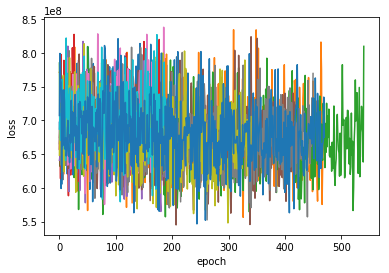

In [2]:
from importlib import reload
import ei_multisampleQ #import *
reload(ei_multisampleQ)
from ei_multisampleQ import *
import cProfile as profile

#ec,erc = legible_values(3,3)
#print(ec,"\n",erc,"\n",ec+erc)
#inits = good_inits(1.)
#del inits["ercstar_raw"]
for (nsamps,subn) in [(15,100)]:#[(2,60),(5,60),(2,30),(20,30),(40,5)]:
    
    for i in range(10):
        for sigma_nu in [ .3,.1,  .02,]: #.02, 
            #%prun result = trainGuide(nsamps=nsamps,subsample_n=subn)#inits = inits)
            trainGuide(nsamps=nsamps,subsample_n=subn,sigmanu=sigma_nu,dversion=i, force_full=True)#,inits = inits)
            #modelQvar(sigmanu=sigma_nu)#,samps=5)
            


.

.

.



In [2]:
from importlib import reload
import ei_multisample #import *
reload(ei_multisample)
from ei_multisample import *
import cProfile as profile

inits = dict() #good_inits()
#del inits["ercstar_raw"]
#%prun result = trainGuide(inits = inits)

NCparams = EIData.load("NC_Data/NC_2016_statewide_alpha_and_beta.csv")
print(NCparams.alpha + NCparams.beta)
#print("components")
#print(NCparams.alpha)
#
#print(NCparams.beta)
print(SIM_SIGMA_NU)
SIM_SIGMA_NU = 0.001
print(ei_multisample.SIM_SIGMA_NU)
ei_multisample.SIM_SIGMA_NU = .0001
print(ei_multisample.SIM_SIGMA_NU)

base:Yes, I will run. line 5 3 :
Reloading polytopize.
tensor([[ 0.0500, -0.9100,  1.2200],
        [ 0.2100,  0.0100, -0.9500],
        [ 0.3400, -0.5400,  0.5800]])
0.15
0.15
0.0001


# Testing hessian transparency

In [18]:
import torch
ts = torch.tensor
os = torch.ones
zs = torch.zeros
from importlib import reload
import myhessian
reload(myhessian)

t1 = os(2,2,requires_grad=True)
r = torch.sum(t1 * t1 * t1)

h = myhessian.hessian(r,t1)
print("hess",h)
r2 = torch.sum(h * h)
[r3] = torch.autograd.grad(r,t1,create_graph=True,retain_graph=True)
print("d ",r3)
print("Σd ",torch.sum(r3))
[r4] = torch.autograd.grad(torch.sum(r3),t1,create_graph=True,retain_graph=True)
print("dΣdΣd ",torch.autograd.grad(torch.sum(r4),t1,create_graph=True,retain_graph=True))
print(torch.autograd.grad(r2,t1))

hess tensor([[6., 0., 0., 0.],
        [0., 6., 0., 0.],
        [0., 0., 6., 0.],
        [0., 0., 0., 6.]], grad_fn=<CopySlices>)
d  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
Σd  tensor(12., grad_fn=<SumBackward0>)
dΣdΣd  (tensor([[6., 6.],
        [6., 6.]]),)
(tensor([[72., 72.],
        [72., 72.]]),)


In [4]:
import sys
import hessian

from importlib import reload
import polytopize #import *
reload(polytopize)
from polytopize import *

import tests


Yes, I will run.
Yes, I will run.
ge fail
loc tensor([[ 0.3147],
        [ 2.4440],
        [-4.0535],
        [ 2.2007]])
polytopedLoc tensor([[ 2.1063e-01,  2.1136e-02],
        [ 2.8514e-01, -1.8626e-09],
        [ 3.4959e-01,  9.9957e-02],
        [ 3.5462e-01,  1.1892e-02],
        [ 2.5462e+00,  3.2228e-01]])
ge fail
loc tensor([[-5.8855],
        [-5.2805],
        [ 5.4654],
        [ 0.1889]])
polytopedLoc tensor([[ 2.8885e-01,  1.1871e+00],
        [ 8.5629e-01,  2.0505e+00],
        [ 3.9984e-01, -1.4901e-08],
        [ 9.5542e-01,  1.5538e+00],
        [ 1.0063e+00,  9.9522e-01]])
Reloading cmult...
callable? <bound method TorchDistributionMixin.__call__ of Multinomial()>
callable? <bound method TorchDistributionMixin.__call__ of TorchCMult()>
Sampling multinomial: tensor([1., 2.])
Sampling cm2: tensor([0., 3.])
tensor(5.6022, grad_fn=<NegBackward>) tensor([[112.2500]])


# Test rank1torch (to get yhat from pi,n,v)

In [10]:
from importlib import reload
import rank1torch #import *
reload(rank1torch)
from rank1torch import *

test_solver()

Testing optimize_Q (50 tests): 
R=3, C=5, tolerance=0.001
Oh no! In test 3, Q has some negative entries:
	 trueQ[2][4]=0.00010659269901225343, 
	     Q[2][4]=-0.00021605131041724235
Oh no! In test 5, Q has some negative entries:
	 trueQ[1][4]=0.00011974151857430115, 
	     Q[1][4]=-1.1631345842033625e-06
Oh no! In test 8, Q has some negative entries:
	 trueQ[0][1]=2.882161788875237e-05, 
	     Q[0][1]=-0.0004783869662787765
Oh no! In test 15, Q has some negative entries:
	 trueQ[2][3]=0.0007846675580367446, 
	     Q[2][3]=-6.166117964312434e-05
Oh no! In test 28, Q has some negative entries:
	 trueQ[0][4]=8.13114020274952e-05, 
	     Q[0][4]=-0.00018321917741559446
Oh no! In test 40, Q has some negative entries:
	 trueQ[2][3]=0.00032634526723995805, 
	     Q[2][3]=-0.000617634505033493
Oh no! In test 47, Q has some negative entries:
	 trueQ[2][1]=0.00017936740186996758, 
	     Q[2][1]=-0.00041433278238400817
Oh no! In test 48, Q has some negative entries:
	 trueQ[0][0]=4.52485837740823

## Overview

Most SVI problems in pyro are coded as a model, a generic guide (such as: multivariate Gaussian in all parameters), and specific observations/data (passed as arguments to svi.step). For EI, that's going to be different; the observations are going to be built into the guide function, leaving nothing to include in the "data" argument to svi.step.

That means there is a lot of work for the guide to do. As usual, it must establish reasonable distributional families for the posterior of each of the hyperparameters. But for the latent parameters, the job of the guide is to take a "relative strength" number for each race/candidate/precinct combo, and turn that into a number of votes for each combo, such that those numbers obey all the constraints set by observations. This means that for each precinct (considered separately), the latent guide must:

-Find the "center point" where candidate preference is independent of race.

-Find the "basis vectors" (actually, there are more than enough of them to form a basis) which determine the directions to move in the space.

-For any given set of "relative strengths" which is a distance $d$ in a direction $\theta$, find the first constraint violated when moving in that direction, and the distance $r$ between the origin and that constraint.

-Project the "relative strengths" onto the numbers of votes, by moving $r(1-e^{-d})$ in direction $\theta$.

#### a = zs(2,2,2,2)
a[0,1,1,1] = 2
print(a[1,1])
print(a[0,1])
print(torch.max(a))
print(torch.distributions.exponential.Exponential(ts([1])).sample(4))